In [1]:
import numpy as np
import pandas as pd
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns
import os, glob, random

from tqdm import tqdm


import cv2

# plt.style.use('seaborn-v0_8-darkgrid')
# sns.set_palette('husl')
%matplotlib inline

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)


In [2]:
os.getcwd()
project_path    = os.getcwd()
data_path       = os.path.join(project_path, 'data')

print('project_path: ', project_path) 
if os.path.exists(data_path):
    print('data_path exists')
    print('data_path: ', data_path)
    for item in os.listdir(data_path):
        print(f"  - {item}")
else:
    print('data_path does not exist')



project_path:  /Users/k.choi/Documents/github/csiro_git
data_path exists
data_path:  /Users/k.choi/Documents/github/csiro_git/data
  - .DS_Store
  - test
  - test.csv
  - train
  - train.csv
  - sample_submission.csv


In [3]:
## train.csv properties

try:
    train_df = pd.read_csv(os.path.join(data_path, 'train.csv'))
    print(f"shape: {train_df.shape}")
    df_columns = train_df.columns
    print(f"columns: {df_columns}") 
    print(f"info: {train_df.info()}")
    # print(f"describe: {train_df.describe()}")

except Exception as e:
    print('train.csv does not exist')
    print(e)

shape: (1785, 9)
columns: Index(['sample_id', 'image_path', 'Sampling_Date', 'State', 'Species',
       'Pre_GSHH_NDVI', 'Height_Ave_cm', 'target_name', 'target'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1785 entries, 0 to 1784
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   sample_id      1785 non-null   object 
 1   image_path     1785 non-null   object 
 2   Sampling_Date  1785 non-null   object 
 3   State          1785 non-null   object 
 4   Species        1785 non-null   object 
 5   Pre_GSHH_NDVI  1785 non-null   float64
 6   Height_Ave_cm  1785 non-null   float64
 7   target_name    1785 non-null   object 
 8   target         1785 non-null   float64
dtypes: float64(3), object(6)
memory usage: 125.6+ KB
info: None


In [4]:
## train.csv check null

missing     = train_df.isnull().sum() 
duplicated  = train_df.duplicated().sum()

print(f"missing: {missing}")
print(f"duplicated: {duplicated}")


missing: sample_id        0
image_path       0
Sampling_Date    0
State            0
Species          0
Pre_GSHH_NDVI    0
Height_Ave_cm    0
target_name      0
target           0
dtype: int64
duplicated: 0


--  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  
species: ['Ryegrass_Clover' 'Lucerne' 'SubcloverDalkeith' 'Ryegrass'
 'Phalaris_Clover' 'SubcloverLosa' 'Clover' 'Fescue_CrumbWeed'
 'Phalaris_Ryegrass_Clover' 'Phalaris' 'WhiteClover' 'Fescue'
 'Phalaris_BarleyGrass_SilverGrass_SpearGrass_Clover_Capeweed'
 'Phalaris_Clover_Ryegrass_Barleygrass_Bromegrass' 'Mixed']
--  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  
target_name: ['Dry_Clover_g' 'Dry_Dead_g' 'Dry_Green_g' 'Dry_Total_g' 'GDM_g']
--  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  
State: ['Tas' 'NSW' 'WA' 'Vic']


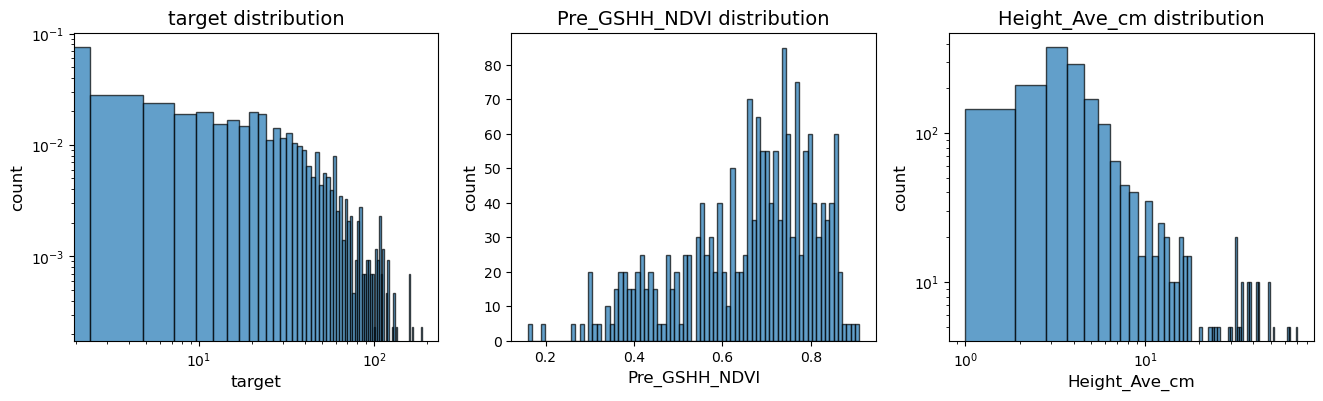

In [5]:
if 'Species' in df_columns:
    print(10*'--  --  --  ')
    print(f"species: {train_df['Species'].unique()}")
if 'target_name' in df_columns:
    print(10*'--  --  --  ')
    print(f"target_name: {train_df['target_name'].unique()}")
if 'State' in df_columns:
    print(10*'--  --  --  ')
    print(f"State: {train_df['State'].unique()}")
 
fig , axes = plt.subplots(1, 3, figsize=(16, 4))
axes = axes.flatten()

## target distribution

axes[0].hist(train_df['target'], bins=77, edgecolor='black', alpha=0.7, density=True);
axes[0].set_xlabel('target', fontsize=12)
axes[0].set_ylabel('count', fontsize=12) 
axes[0].set_xscale('log')
axes[0].set_yscale('log')
axes[0].set_title('target distribution', fontsize=14)

## Pre_GSHH_NDVI 
axes[1].hist(train_df['Pre_GSHH_NDVI'], bins=77, edgecolor='black', alpha=0.7);
axes[1].set_xlabel('Pre_GSHH_NDVI', fontsize=12)
axes[1].set_ylabel('count', fontsize=12) 
axes[1].set_title('Pre_GSHH_NDVI distribution', fontsize=14)

axes[2].hist(train_df['Height_Ave_cm'], bins=77, edgecolor='black', alpha=0.7);
axes[2].set_xlabel('Height_Ave_cm', fontsize=12)
axes[2].set_ylabel('count', fontsize=12) 
axes[2].set_xscale('log')
axes[2].set_yscale('log')
axes[2].set_title('Height_Ave_cm distribution', fontsize=14)
plt.show()


[Text(0, 0, 'Dry_Clover_g'),
 Text(1, 0, 'Dry_Dead_g'),
 Text(2, 0, 'Dry_Green_g'),
 Text(3, 0, 'Dry_Total_g'),
 Text(4, 0, 'GDM_g')]

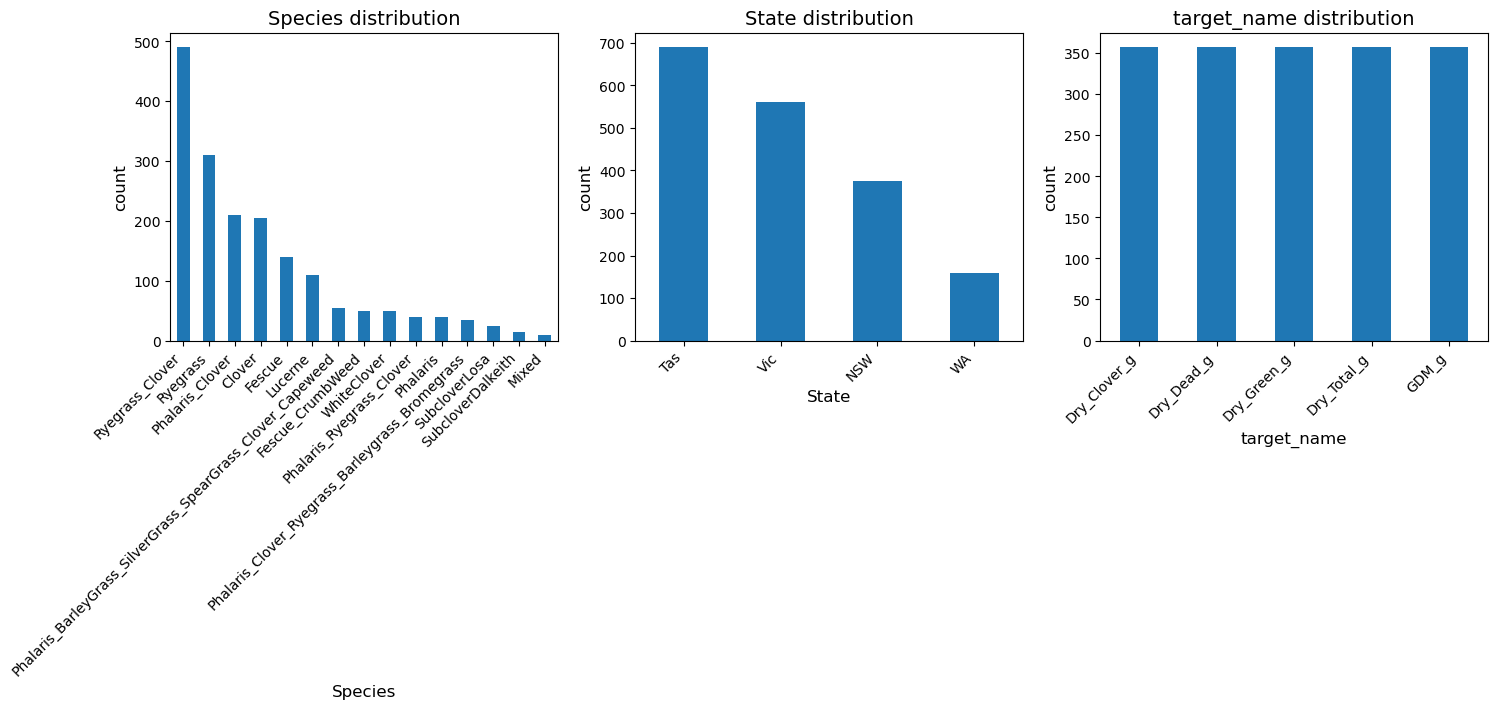

In [6]:
fig, axes = plt.subplots(1, 3, figsize=(17, 4))
axes = axes.flatten()

train_df['Species'].value_counts().plot(kind='bar', ax=axes[0])
axes[0].set_title('Species distribution', fontsize=14)
axes[0].set_xlabel('Species', fontsize=12)
axes[0].set_ylabel('count', fontsize=12)
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha='right')

train_df['State'].value_counts().plot(kind='bar', ax=axes[1])
axes[1].set_title('State distribution', fontsize=14)
axes[1].set_xlabel('State', fontsize=12)
axes[1].set_ylabel('count', fontsize=12)
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, ha='right')

train_df['target_name'].value_counts().plot(kind='bar', ax=axes[2])
axes[2].set_title('target_name distribution', fontsize=14)
axes[2].set_xlabel('target_name', fontsize=12)
axes[2].set_ylabel('count', fontsize=12)
axes[2].set_xticklabels(axes[2].get_xticklabels(), rotation=45, ha='right')






target: Dry_Clover_g
correlation ( target, Pre_GSHH_NDVI ) : 0.22
correlation ( target, Height_Ave_cm ) : -0.16
target: Dry_Dead_g
correlation ( target, Pre_GSHH_NDVI ) : -0.12
correlation ( target, Height_Ave_cm ) : -0.05
target: Dry_Green_g
correlation ( target, Pre_GSHH_NDVI ) : 0.35
correlation ( target, Height_Ave_cm ) : 0.65
target: Dry_Total_g
correlation ( target, Pre_GSHH_NDVI ) : 0.36
correlation ( target, Height_Ave_cm ) : 0.50
target: GDM_g
correlation ( target, Pre_GSHH_NDVI ) : 0.47
correlation ( target, Height_Ave_cm ) : 0.58


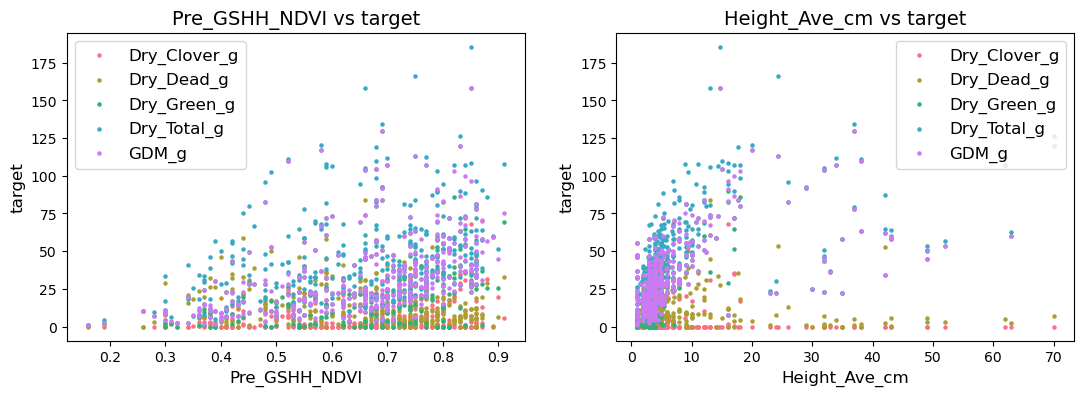

In [7]:
# Correlation 

fig, axes = plt.subplots(1, 2, figsize=(13, 4))

color = sns.color_palette('husl', len(train_df['target_name'].unique()))

for i, target in enumerate(train_df['target_name'].unique()):
    target_df = train_df[train_df['target_name'] == target]

    print(f"target: {target}")
    print(f'correlation ( target, Pre_GSHH_NDVI ) : {target_df["target"].corr(target_df["Pre_GSHH_NDVI"]):.2f}')
    print(f'correlation ( target, Height_Ave_cm ) : {target_df["target"].corr(target_df["Height_Ave_cm"]):.2f}')

    axes[0].scatter(target_df['Pre_GSHH_NDVI'], target_df['target'], alpha=1, color=color[i], label=target, s=5)
    axes[0].set_xlabel('Pre_GSHH_NDVI', fontsize=12)
    axes[0].set_ylabel('target', fontsize=12) 
    axes[0].legend(fontsize=12) 
    axes[0].set_title('Pre_GSHH_NDVI vs target', fontsize=14)

    axes[1].scatter(target_df['Height_Ave_cm'], target_df['target'], alpha=1, color=color[i], label=target, s=5)
    axes[1].set_xlabel('Height_Ave_cm', fontsize=12)
    axes[1].set_ylabel('target', fontsize=12) 
    axes[1].legend(fontsize=12)
    axes[1].set_title('Height_Ave_cm vs target', fontsize=14)




/Users/k.choi/Documents/github/csiro_git/data/train/ID1781353117.jpg


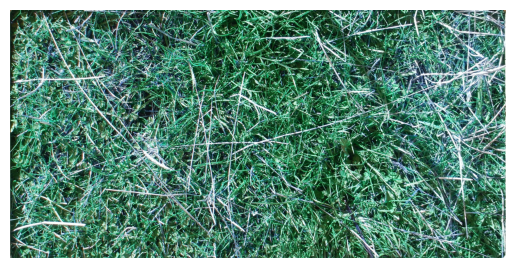

img.shape: (1000, 2000, 3)


In [9]:
def read_image(image_path):
    img     = cv2.imread(image_path) 
    plt.imshow(img)
    plt.axis('off')
    plt.show()

    print(f'img.shape: {img.shape}')
    
imag_path = os.path.join(data_path, 'train')

img_list    = glob.glob(imag_path+'/*.jpg')
rand_img    = random.choice(img_list)

print( rand_img )
read_image(rand_img)


In [97]:
%%time

def analyze_image(img_rgb): 

    r_mean, g_mean, b_mean  = img_rgb.mean(axis=0).mean(axis=0)
    r_std, g_std, b_std     = img_rgb.std(axis=0).std(axis=0)

    g_mask          = ( img_rgb[:,:,1] > img_rgb[:,:,0] ) & ( img_rgb[:,:,1] > img_rgb[:,:,2] )
    green_coverage  = g_mask.sum() / ( img_rgb.shape[0] * img_rgb.shape[1] )
    return {'r_mean': r_mean, 'g_mean': g_mean, 'b_mean': b_mean, 'r_std': r_std, 'g_std': g_std, 'b_std': b_std, 'green_coverage': green_coverage}
 

color_summary = [] 
n_sample      = 100

print('color summary for {} samples: '.format(n_sample))
for imgs in tqdm(random.sample(img_list, n_sample)):

    img     = cv2.imread(imgs)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  

    color_summary.append(analyze_image(img_rgb))

color_df = pd.DataFrame(color_summary)
print(color_df.describe())

    # img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)


    



color summary for 100 samples: 


100%|██████████| 100/100 [00:04<00:00, 20.48it/s]


           r_mean      g_mean      b_mean       r_std       g_std       b_std  \
count  100.000000  100.000000  100.000000  100.000000  100.000000  100.000000   
mean   113.255303  128.414208   75.749666    4.994218    4.903110    5.383768   
std     16.287447   17.729249   18.792683    1.539513    1.367312    1.819674   
min     66.530232   49.100885   41.678425    2.750910    2.509591    2.304039   
25%    102.795900  118.154856   60.813293    4.124906    3.992327    4.196468   
50%    114.304740  131.081505   74.350754    4.652905    4.688608    4.944272   
75%    124.179577  140.419927   84.606553    5.342500    5.393397    6.114541   
max    151.871227  158.660305  140.230263   11.309478    9.545613   13.180375   

       green_coverage  
count      100.000000  
mean         0.707992  
std          0.256457  
min          0.033965  
25%          0.535057  
50%          0.751989  
75%          0.932698  
max          0.999540  
CPU times: user 4.37 s, sys: 586 ms, total: 4.96 s
Wal

'/Users/k.choi/Documents/github/csiro_git/data/train'